<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [1]:
pwd

u'C:\\Users\\lyoung\\desktop\\DS-SF-42\\classes\\09\\eda-telecomm_group_project-lab'

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

!conda install folium --yes
!pip install folium

!pip install geopy

# pygmaps

!pip install gpxpy
import gpxpy.geo

Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - folium

Current channels:

  - https://repo.continuum.io/pkgs/main/win-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/win-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/win-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/win-64
  - https://repo.continuum.io/pkgs/pro/noarch
  - https://repo.continuum.io/pkgs/msys2/win-64
  - https://repo.continuum.io/pkgs/msys2/noarch




In [12]:
df = pd.read_csv('datasets\metadata.csv')
df

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690


In [14]:
df.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [15]:
df['Cell Tower Location'].value_counts()

BALGOWLAH HAYES ST                          4301
CHIPPENDALE                                 1084
SUNDERLAND ST                                723
REDFERN TE                                   712
HAYMARKET #                                  563
BRICKWORKS                                   501
HARBORD 22 WAINE ST                          465
FAIRLIGHT 137 SYDNEY RD                      454
MANLY #                                      231
NEW TOWN                                     197
CHINATOWN                                    161
BEECHWORTH                                   112
BALGOWLAH VILLAGE SHOPPING CENTRE IBC        106
MANLY SOUTH STEYNE                            92
BROADWAY OTC                                  85
MASCOT INTERNATIONAL AIRPORT TERMINAL T1      65
71 MACQUARIE ST                               49
SURRY HILLS 418A ELIZABETH ST                 45
MANLY NTH STEYNE                              40
MASCOT M5 MOTORWAY EMERGENCY STAIRS           33
BALGOWLAH TE        

In [19]:
df.groupby('Cell Tower Location')['Comm Type'].value_counts()

Cell Tower Location                       Comm Type
71 MACQUARIE ST                           Internet       40
                                          Phone           8
                                          SMS             1
AIRPORT LINK                              Internet        4
                                          Phone           1
ASCOT VALE SOUTH                          Phone           1
BALGOWLAH HAYES ST                        Internet     3929
                                          SMS           206
                                          Phone         166
BALGOWLAH TE                              Internet       27
                                          Phone           2
                                          SMS             1
BALGOWLAH VILLAGE SHOPPING CENTRE IBC     Internet       96
                                          Phone           6
                                          SMS             4
BEECHWORTH                                Intern

In [22]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

location = geolocator.reverse()
print(location.address)

In [27]:
#Map

import folium
map_osm = folium.Map(location=[45.52356,-122.650])
map_osm

In [34]:
colors = {'A' : 'red', 'B' : 'blue'}

map_osm_test = folium.Map(location=[40.742, -73.956], zoom_start=11)

test= df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10)
                                             .add_to(map_osm_test), axis=1)
test

0        <folium.features.CircleMarker object at 0x0000...
1        <folium.features.CircleMarker object at 0x0000...
2        <folium.features.CircleMarker object at 0x0000...
3        <folium.features.CircleMarker object at 0x0000...
4        <folium.features.CircleMarker object at 0x0000...
5        <folium.features.CircleMarker object at 0x0000...
6        <folium.features.CircleMarker object at 0x0000...
7        <folium.features.CircleMarker object at 0x0000...
8        <folium.features.CircleMarker object at 0x0000...
9        <folium.features.CircleMarker object at 0x0000...
10       <folium.features.CircleMarker object at 0x0000...
11       <folium.features.CircleMarker object at 0x0000...
12       <folium.features.CircleMarker object at 0x0000...
13       <folium.features.CircleMarker object at 0x0000...
14       <folium.features.CircleMarker object at 0x0000...
15       <folium.features.CircleMarker object at 0x0000...
16       <folium.features.CircleMarker object at 0x0000.

In [32]:
map_osm_test

In [33]:
4+4

8

In [44]:
dates = pd.to_datetime(df['Comm Timedate String'])

In [54]:
df['dayofmonth'] = dates.dt.month
df

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,dayofweek,dayofmonth
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,4,4
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,4,4
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,4,4
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,4,4
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,4,4
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350,4,4
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350,4,4
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296,4,4
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690,4,4
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690,4,4


In [56]:
df['hourofday'] = dates.dt.hour
df

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,dayofweek,dayofmonth,hourofday
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,4,4,9
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,4,4,9
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,4,4,13
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,4,4,13
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,4,4,17
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350,4,4,17
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350,4,4,17
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296,4,4,19
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690,4,4,14
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690,4,4,14


In [87]:
new = df.groupby('Comm Type')['hourofday'].value_counts()
new

# Internet use highest between 5-6 pm and 8 - 9 pm
# Phone use highest at 5-6 pm and 9 and 10 am
# Text between 5-7 pm/9pm and again during lunch at 12 pm

Comm Type  hourofday
Internet   18           693
           19           666
           17           654
           20           637
           21           589
           10           553
           16           548
           12           531
           13           520
           9            478
           15           478
           14           452
           11           408
           8            360
           22           310
           7            276
           6            198
           23           152
           2            139
           1            106
           4             99
           0             91
           3             84
           5             80
Phone      17            88
           18            86
           9             62
           10            61
           16            57
           19            54
                       ... 
           12            39
           14            31
           21            31
           8             16

NameError: name 'plt' is not defined

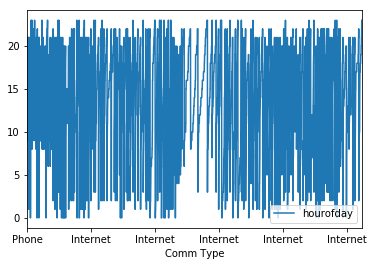

In [79]:
df.plot(x='Comm Type', y='hourofday')
%matplotlib inline


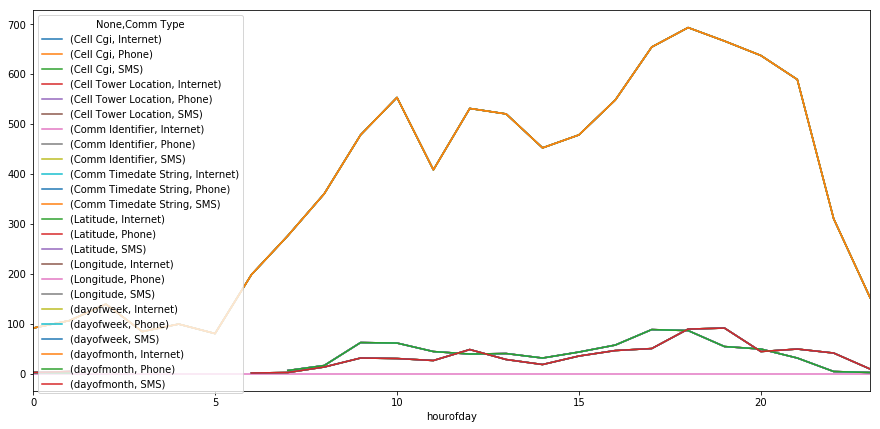

In [97]:


# plot data
fig, ax = pl.subplots(figsize=(15,7))

# use unstack()
df.groupby(['hourofday','Comm Type']).count().unstack().plot(ax=ax)

In [108]:
df_1 = df[['hourofday','Comm Type']]

df_1



,hourofday,Comm Type
0,9,Phone
1,9,Phone
2,13,Phone
3,13,Phone
4,17,Phone
5,17,Phone
6,17,Phone
7,19,Phone
8,14,Phone
9,14,Phone


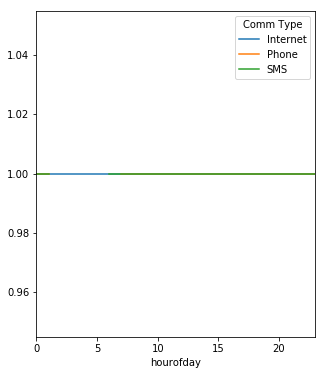

In [106]:
# plot data
fig, ax = pl.subplots(figsize=(5,6))

# use unstack()
new.groupby(['hourofday','Comm Type']).count().unstack().plot(ax=ax)